In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
import keras.backend as K

%matplotlib inline

Using TensorFlow backend.


In [2]:
mcycle = pd.read_csv('/home/chase/projects/peakload/KerasQuantileModel/mcycle',delimiter='\t')

In [3]:
mcycle.times = (mcycle.times - mcycle.times.mean())/mcycle.times.std()
mcycle.accel = (mcycle.accel - mcycle.accel.mean())/mcycle.accel.std()

In [4]:
model = Sequential()
model.add(Dense(units=10, input_dim=1,activation='relu'))
model.add(Dense(units=10, input_dim=1,activation='relu'))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adadelta')
model.fit(mcycle.times.values, mcycle.accel.values, epochs=2000, batch_size=32, verbose=0)
model.evaluate(mcycle.times.values, mcycle.accel.values)

94/94 [==============================] - 0s 854us/step


0.28790935176484128

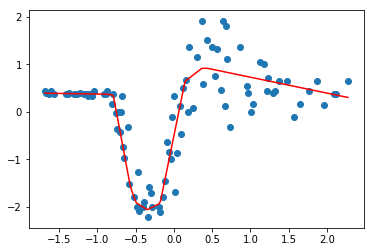

In [5]:
t_test = np.linspace(mcycle.times.min(),mcycle.times.max(),200)
y_test = model.predict(t_test)

plt.scatter(mcycle.times,mcycle.accel)
plt.plot(t_test, y_test,'r')
plt.show()

In [6]:
def tilted_loss(q,y,f):
    e = (y-f)
    return K.mean(K.maximum(q*e, (q-1)*e), axis=-1)

In [7]:
def mcycleModel():
    model = Sequential()
    model.add(Dense(units=10, input_dim=1,activation='relu'))
    model.add(Dense(units=10, input_dim=1,activation='relu'))
    model.add(Dense(1))
    
    return model

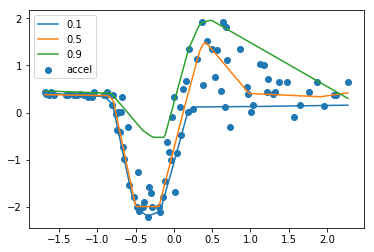

In [8]:
qs = [0.1, 0.5, 0.9]

t_test = np.linspace(mcycle.times.min(),mcycle.times.max(),200)
plt.scatter(mcycle.times,mcycle.accel)

for q in qs:
    model = mcycleModel()
    model.compile(loss=lambda y,f: tilted_loss(q,y,f), optimizer='adadelta')
    model.fit(mcycle.times.values, mcycle.accel.values, epochs=2000, batch_size=32, verbose=0)
    
    # Predict the quantile
    y_test = model.predict(t_test)
    plt.plot(t_test, y_test, label=q) # plot out this quantile

plt.legend()    
plt.show()

In [24]:
mcycle.accel.values.shape

(94,)

In [23]:
y_test.shape

(200, 1)

In [18]:
import datetime

#ERCOT data
lds = datetime.datetime(year=2016, month=2, day=29, hour=0, minute=0) #lines 1415 to 1439
lde = datetime.datetime(year=2016, month=2, day=29, hour=23, minute=0)

path = "/home/chase/projects/peakload/data/ercot/"
ercot2017 = pd.read_excel(path + "native_Load_2017.xlsx")
ercot2016 = pd.read_excel(path + "native_Load_2016.xlsx") #leap year
ercot2016.drop(ercot2016.index[1415:1439], inplace=True)

ercot2015 = pd.read_excel(path + "native_Load_2015.xls")
ercot2014 = pd.read_excel(path + "2014_ERCOT_Hourly_Load_Data.xls")
ercot2013 = pd.read_excel(path + "2013_ERCOT_Hourly_Load_Data.xls")
ercot2012 = pd.read_excel(path + "2012_ERCOT_Hourly_Load_Data.xls") #leap year
ercot2012.drop(ercot2012.index[1415:1439], inplace=True)

ercot2011 = pd.read_excel(path + "2011_ERCOT_Hourly_Load_Data.xls")
ercot2010 = pd.read_excel(path + "2010_ERCOT_Hourly_Load_Data.xls")

ercotdata = list(ercot2010['ERCOT']) + list(ercot2011['ERCOT']) + list(ercot2012['ERCOT']) + list(ercot2013['ERCOT']) + list(ercot2014['ERCOT']) + list(ercot2015['ERCOT']) + list(ercot2016['ERCOT']) + list(ercot2017['ERCOT'])

yearly_data = [ercot2010, ercot2011, ercot2012, ercot2013, ercot2014, ercot2015, ercot2016, ercot2017]
yearly_loads = np.zeros((8,8760))

for i in range(len(yearly_data)):
    yearly_loads[i,:] = np.array(yearly_data[i]['ERCOT'])

peaks_i = np.nanargmax(yearly_loads,axis=1)
peaks = np.zeros((yearly_loads.shape[0],1))
for i in range(yearly_loads.shape[0]):
    peaks[i] = yearly_loads[i, peaks_i[i]]

In [19]:
train_data = yearly_loads[0:6,:]
train_data_vec = yearly_loads[0,:]
for j in range(1,train_data.shape[0]):
    train_data_vec = np.concatenate((train_data_vec, train_data[j,:]), axis= 0)

val_data = yearly_loads[7:,:]

train_data_labels = np.zeros((train_data.shape[0]*train_data.shape[1], 1))
val_data_labels = np.zeros((val_data.shape[0]*val_data.shape[1], 1))

In [26]:
y_test

array([[ 0.46047157],
       [ 0.45930344],
       [ 0.45813555],
       [ 0.45696753],
       [ 0.45579976],
       [ 0.45463151],
       [ 0.45346349],
       [ 0.45229548],
       [ 0.45112759],
       [ 0.44995958],
       [ 0.44879156],
       [ 0.44762379],
       [ 0.44645554],
       [ 0.4452877 ],
       [ 0.44411957],
       [ 0.44295138],
       [ 0.44178373],
       [ 0.44061577],
       [ 0.43944788],
       [ 0.43827987],
       [ 0.43711179],
       [ 0.4359439 ],
       [ 0.43477613],
       [ 0.43360806],
       [ 0.43244016],
       [ 0.43127203],
       [ 0.43010408],
       [ 0.4289363 ],
       [ 0.42776823],
       [ 0.42660034],
       [ 0.42543232],
       [ 0.42426443],
       [ 0.42309624],
       [ 0.42192817],
       [ 0.42076033],
       [ 0.4195925 ],
       [ 0.41842443],
       [ 0.41725647],
       [ 0.4160884 ],
       [ 0.41492063],
       [ 0.41375268],
       [ 0.4125846 ],
       [ 0.41141665],
       [ 0.41024864],
       [ 0.39452857],
       [ 0

KeyboardInterrupt: 

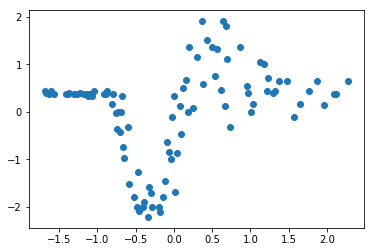

In [27]:
qs = [0.1, 0.5, 0.9]

times = np.arange(0,52560,1)

t_test = np.linspace(times.min(),times.max(),60000)
plt.scatter(mcycle.times,mcycle.accel)

for q in qs:
    model = mcycleModel()
    model.compile(loss=lambda y,f: tilted_loss(q,y,f), optimizer='adadelta')
    model.fit(times, train_data_vec, epochs=2000, batch_size=32, verbose=0)
    
    # Predict the quantile
    y_test = model.predict(t_test)
    plt.plot(t_test, y_test, label=q) # plot out this quantile

plt.legend()    
plt.show()